# Laboratory Session 3
Alessandro Fella 2024285

In [325]:
library("zoom")
library("scales")
library("cowplot")
library("plotly")
library("plotly")
library("ggplot2")
library("gridExtra")
library("readr")
library("tidyverse")

**Ex 01**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



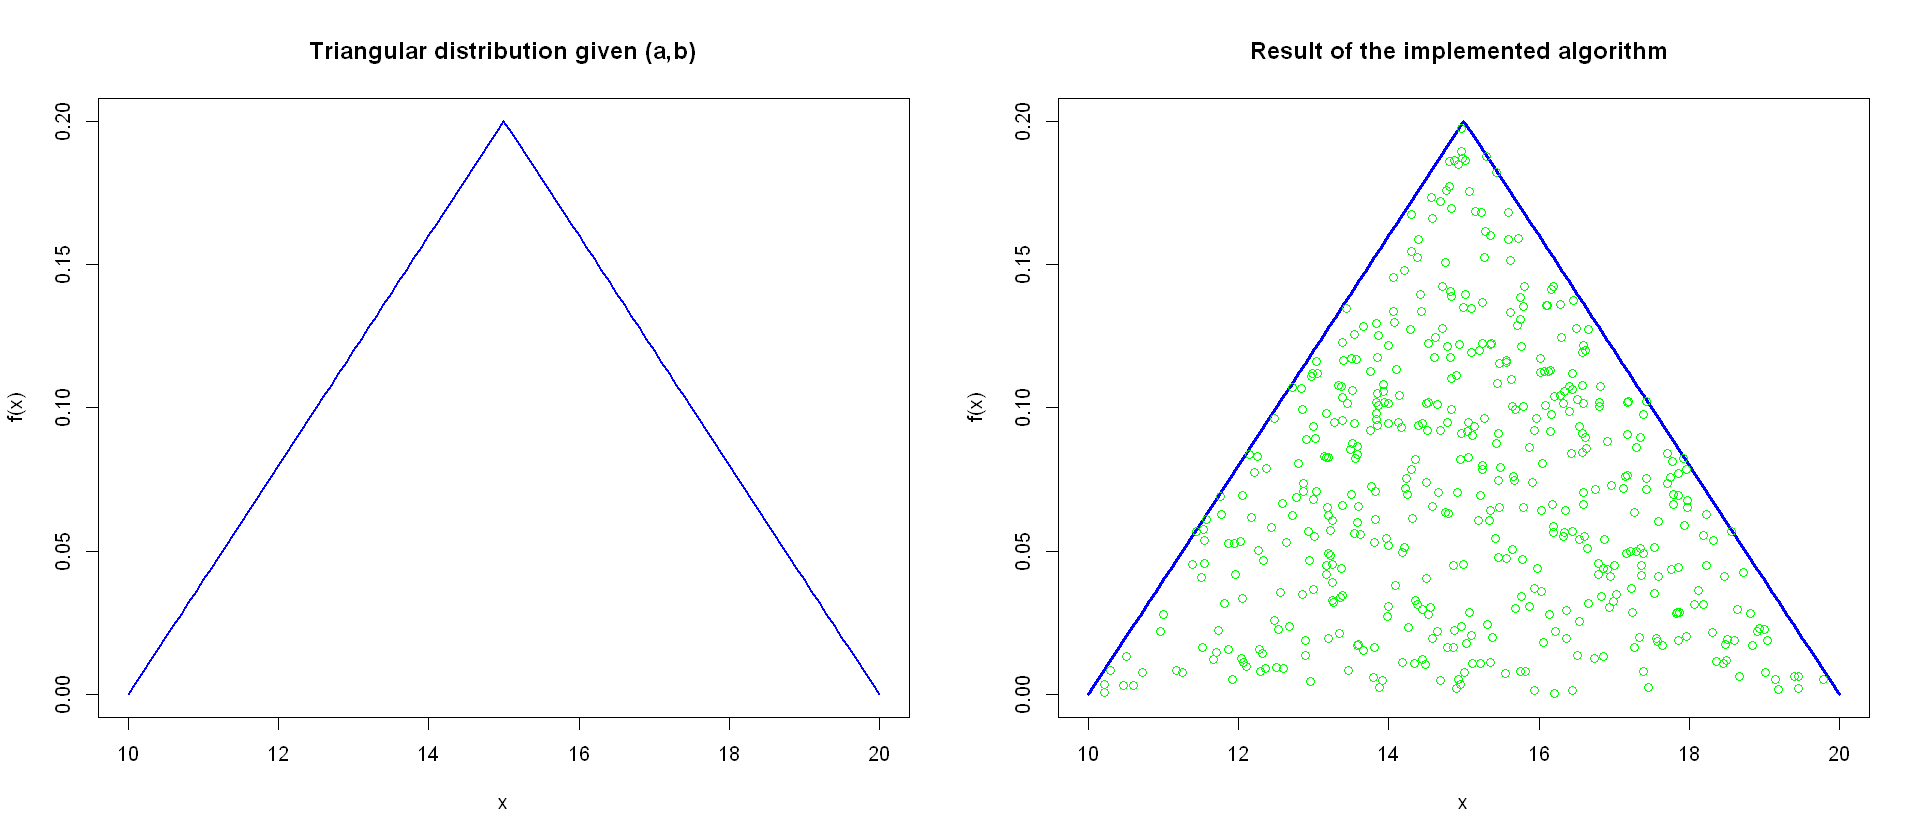

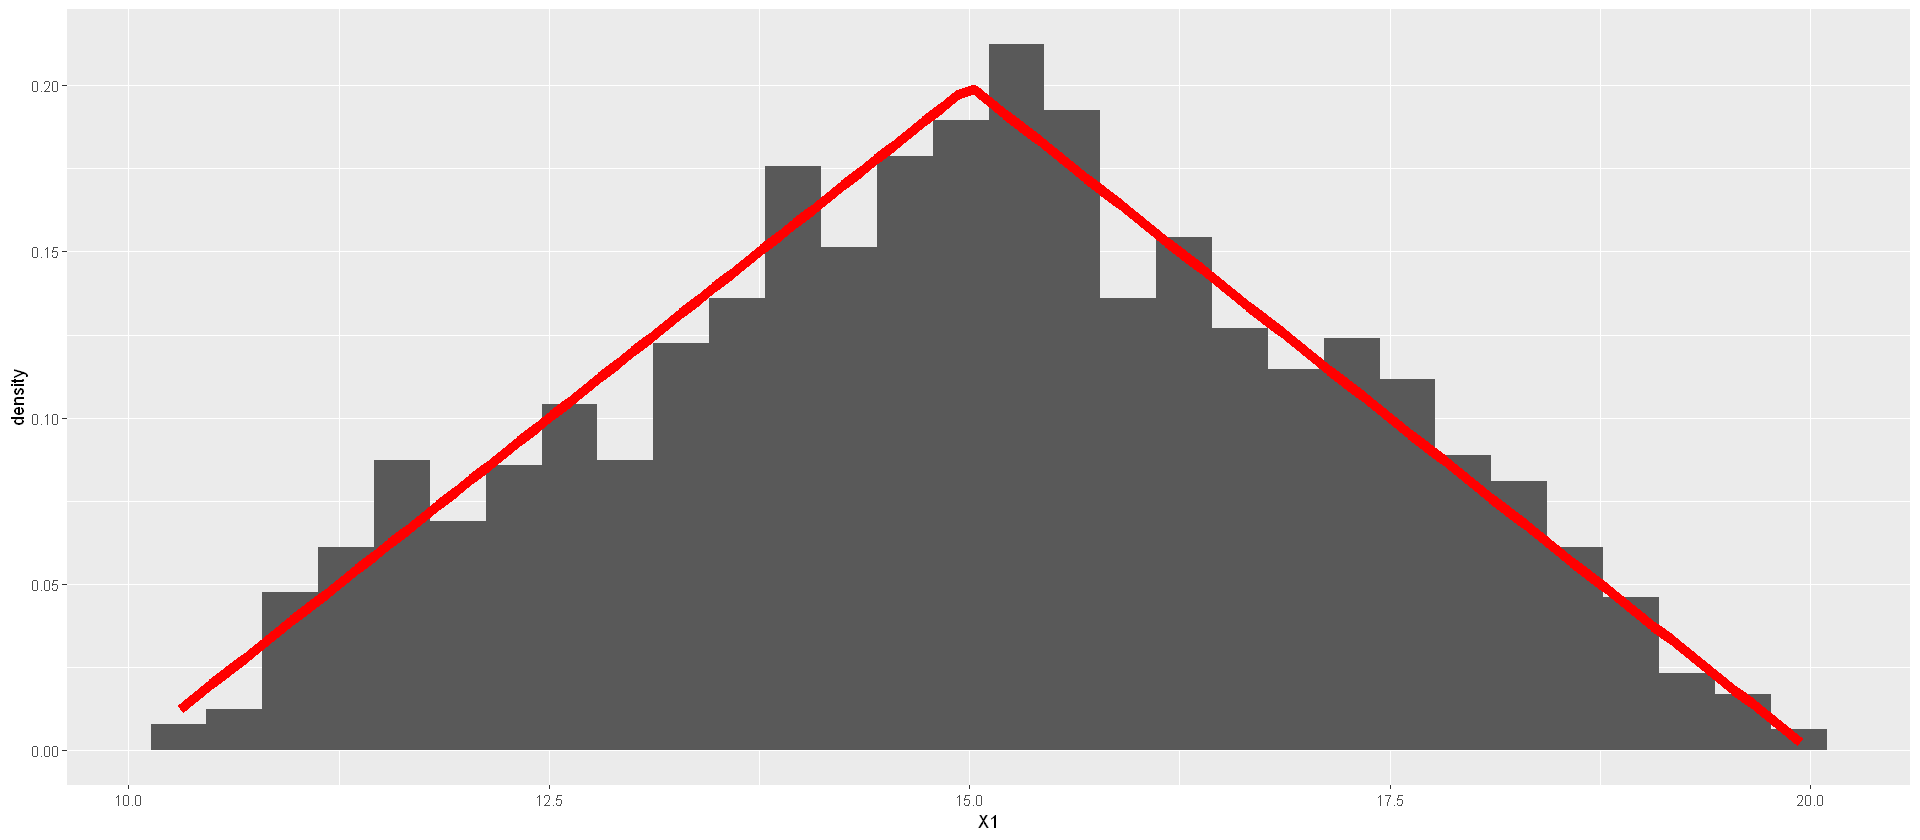

In [456]:
#PARAMETERS:
a=10;b=20;c=(a+b)/2;
#The triangular distribution, in the  generic interval (a, b) :
func<- Vectorize(function(a,b,c,x){(a<= x & x< c)*(2*(x-a)/((b-a)*(c-a)))+
                         (c <= x & x<= b)*(2*(b-x)/((b-a)*(b-c)))+
                         (x >b & x <a)*(0)})


#A) plot the function, given the interval (a, b)
par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=7)
x<-seq(a,b,0.1)
p1<-plot(x,func(a,b,c,x), main="Triangular distribution given (a,b)",type="l", col="blue", lwd=2, pch=10,xlab="x", ylab="f(x)")


#B) write an algorithm to generate random numbers from the triangular distribution
accept_reject<-Vectorize(function(x_random,y_random){
for(i in range(1,length(x_random)) ){
    if(y_random[i] <= func(a,b,c,x_random[i]))
               {   return (c(x_random[i],y_random[i]))   }
}} )   

x_sample = runif(1000, min=a, b)
y_sample = runif(1000, min=0, func(a,b,c,c))     
k<-accept_reject(x_sample,y_sample)
k<-k[lengths(k) != 0]
Matrix <- matrix(unlist(k), ncol = 2, byrow = TRUE)
p2<-plot(x,func(a,b,c,x), main="Result of the implemented algorithm ",type="l", col="blue", lwd=3, pch=10,xlab="x", ylab="f(x)")
points(Matrix[,1], Matrix[,2], col="green", lwd=1)


# C) generate 10^4 random number from the distribution, show them in an histogram and su perimpose the analytical curve
x_sample_new = runif(4000, min=a, b)
y_sample_new = runif(4000, min=0, func(a,b,c,c))
k_new<-accept_reject(x_sample_new,y_sample_new)
k_new<-k_new[lengths(k) != 0]
Matrix_new <- matrix(unlist(k_new), ncol = 2, byrow = TRUE)
data<-data.frame(Matrix_new)

ggplot(data, aes(x=X1)) +
  geom_histogram(aes(y = stat(density))) +
  stat_function(fun=function(x) do.call(func, list(a= a, b= b, c= c, x= x)), color = "red", lwd=3) #superimpose a costumized function
                


**Ex 02**

In [ ]:
# exp
dexp(x, rate = 1, log = FALSE)
# unif
dunif(x, min = 3, max = 5, log = FALSE)
# binomial
dbinom(x, n=1, p=0.5)
# poisson
dpois(x, lambda=0.5)


par(mfrow=c(2,2))
options(repr.plot.width=16, repr.plot.height=7)

plot(x,func(a,b,c,x), main="Triangular distribution given (a,b)",type="l", col="blue", lwd=2, pch=10,xlab="x", ylab="f(x)")
